In [11]:
test_images_names_list = [    
    "GF2_PMS1__L1A0001064454-MSS1",
    "GF2_PMS1__L1A0001118839-MSS1",
    "GF2_PMS1__L1A0001344822-MSS1",
    "GF2_PMS1__L1A0001348919-MSS1",
    "GF2_PMS1__L1A0001366278-MSS1",
    "GF2_PMS1__L1A0001366284-MSS1",
    "GF2_PMS1__L1A0001395956-MSS1",
    "GF2_PMS1__L1A0001432972-MSS1",
    "GF2_PMS1__L1A0001670888-MSS1",
    "GF2_PMS1__L1A0001680857-MSS1",
    "GF2_PMS1__L1A0001680858-MSS1",
    "GF2_PMS1__L1A0001757429-MSS1",
    "GF2_PMS1__L1A0001765574-MSS1",
    "GF2_PMS2__L1A0000607677-MSS2",
    "GF2_PMS2__L1A0000607681-MSS2",
    "GF2_PMS2__L1A0000718813-MSS2",
    "GF2_PMS2__L1A0001038935-MSS2",
    "GF2_PMS2__L1A0001038936-MSS2",
    "GF2_PMS2__L1A0001119060-MSS2",
    "GF2_PMS2__L1A0001367840-MSS2",
    "GF2_PMS2__L1A0001378491-MSS2",
    "GF2_PMS2__L1A0001378501-MSS2",
    "GF2_PMS2__L1A0001396036-MSS2",
    "GF2_PMS2__L1A0001396037-MSS2",
    "GF2_PMS2__L1A0001416129-MSS2",
    "GF2_PMS2__L1A0001471436-MSS2",
    "GF2_PMS2__L1A0001517494-MSS2",
    "GF2_PMS2__L1A0001591676-MSS2",
    "GF2_PMS2__L1A0001787564-MSS2",
    "GF2_PMS2__L1A0001821754-MSS2"
    ]



import os
def train_test_split_gaofen_images(images_dir,destiny_path_image_train,destiny_path_image_test):
    for image_idx, image_filename in enumerate(os.listdir(images_dir)):
        image_filename_cmp = image_filename.split(".")[0]
        if image_filename_cmp not in test_images_names_list:
            print(f"{image_idx}-{image_filename} is train")
            os.system("cp " + images_dir + image_filename + " " + destiny_path_image_train)
        else:
            print(f"{image_idx}-{image_filename} is test")
            os.system("cp " + images_dir + image_filename + " " + destiny_path_image_test)


#IMAGES
images_dir = "/home/pablo.canosa/Downloads/dataset_images/" #ADD PATH
destiny_path_image_train = "/home/pablo.canosa/wip/datasets/last_version/train/"#ADD PATH
destiny_path_image_test = "/home/pablo.canosa/wip/datasets/last_version/test/"#ADD PATH

train_test_split_gaofen_images(images_dir,destiny_path_image_train,destiny_path_image_test)  #MASKS


0-GF2_PMS1__L1A0001094941-MSS1.tif is train
1-GF2_PMS2__L1A0001537637-MSS2.tif is train
2-GF2_PMS2__L1A0001251800-MSS2.tif is train
3-GF2_PMS2__L1A0001799010-MSS2.tif is train
4-GF2_PMS1__L1A0001765574-MSS1.tif is test
5-GF2_PMS2__L1A0001566654-MSS2.tif is train
6-GF2_PMS2__L1A0001787577-MSS2.tif is train
7-GF2_PMS1__L1A0001015646-MSS1.tif is train
8-GF2_PMS2__L1A0000564691-MSS2.tif is train
9-GF2_PMS1__L1A0001680858-MSS1.tif is test
10-GF2_PMS2__L1A0001708232-MSS2.tif is train
11-GF2_PMS2__L1A0000958144-MSS2.tif is train
12-GF2_PMS1__L1A0001668483-MSS1.tif is train
13-GF2_PMS1__L1A0001680857-MSS1.tif is test
14-GF2_PMS2__L1A0001367840-MSS2.tif is test
15-GF2_PMS1__L1A0001112719-MSS1.tif is train
16-GF2_PMS1__L1A0001765572-MSS1.tif is train
17-GF2_PMS2__L1A0001378491-MSS2.tif is test
18-GF2_PMS2__L1A0001396034-MSS2.tif is train
19-GF2_PMS2__L1A0000607677-MSS2.tif is test
20-GF2_PMS2__L1A0001517494-MSS2.tif is test
21-GF2_PMS1__L1A0000708367-MSS1.tif is train
22-GF2_PMS1__L1A0001670888-

In [22]:
import os
import numpy as np
from PIL import Image
import cv2

def divide_image_into_quadrants(image, n):
    
    if(len(image.shape) == 3):
        rows, cols, _ = image.shape  
    else:
        rows, cols = image.shape  
    
    num_rows = int(n ** 0.5)
    num_cols = n // num_rows
    
    quadrant_rows = rows // num_rows
    quadrant_cols = cols // num_cols
    
    quadrants = []
    
    for i in range(num_rows):
        for j in range(num_cols):
            start_row = i * quadrant_rows
            end_row = start_row + quadrant_rows
            start_col = j * quadrant_cols
            end_col = start_col + quadrant_cols
            
            quadrant = image[start_row:end_row, start_col:end_col]
            quadrants.append(quadrant)
    
    return quadrants

def process_8bit_images(path_8bit_source, path_8bit_destiny):
    
    for image_name in os.listdir(path_8bit_source):
        print(f"{path_8bit_source}{image_name}")
        image8bits = Image.open(f"{path_8bit_source}{image_name}").convert('CMYK')
        B = 4
        multi = np.zeros((B, image8bits.size[1], image8bits.size[0]))

        for i in range (0, B):
            multi[i,:,:] = np.array(image8bits.getchannel(i))


        
        image_raw = np.moveaxis(multi, 0, -1)

        quadrants = divide_image_into_quadrants(image_raw, 4)


        for idx,q in enumerate(quadrants):  
            print(f"Saving image {image_name[:-4]}_{idx} with shape {q.shape}")

            sizes = np.array([q.shape[0], q.shape[1], q.shape[2]])
            print(sizes)
            image_raw = np.concatenate([sizes, q.flatten()]).astype(np.int32)


            newFile = open(f"{path_8bit_destiny}{os.path.splitext(image_name)[0]}_{idx}.rawb", "wb")
            image_raw.tofile(newFile, format="%d")
            newFile.close()
            
        

In [23]:
# TRAIN
path_8bit_train = "/home/pablo.canosa/wip/datasets/last_version/train/" #Path to the 8bit images
path_8bit_train_destiny = "/home/pablo.canosa/wip/datasets/small_gaofen/train/8bit_rawb/" #Path to save the 8bit images in quadrants
process_8bit_images(path_8bit_train, path_8bit_train_destiny)  

# TEST
path_8bit_test = "/home/pablo.canosa/wip/datasets/last_version/test/"#Path to the 8bit images
path_8bit_test_destiny = "/home/pablo.canosa/wip/datasets/small_gaofen/test/test_8bit_rawb/"#Path to save the 8bit images in quadrants
process_8bit_images(path_8bit_test, path_8bit_test_destiny)

/home/pablo.canosa/wip/datasets/last_version/train/GF2_PMS1__L1A0001094941-MSS1.tif
Saving image GF2_PMS1__L1A0001094941-MSS1_0 with shape (3454, 3650, 4)
[3454 3650    4]
Saving image GF2_PMS1__L1A0001094941-MSS1_1 with shape (3454, 3650, 4)
[3454 3650    4]
Saving image GF2_PMS1__L1A0001094941-MSS1_2 with shape (3454, 3650, 4)
[3454 3650    4]
Saving image GF2_PMS1__L1A0001094941-MSS1_3 with shape (3454, 3650, 4)
[3454 3650    4]
/home/pablo.canosa/wip/datasets/last_version/train/GF2_PMS2__L1A0001537637-MSS2.tif
Saving image GF2_PMS2__L1A0001537637-MSS2_0 with shape (3454, 3650, 4)
[3454 3650    4]
Saving image GF2_PMS2__L1A0001537637-MSS2_1 with shape (3454, 3650, 4)
[3454 3650    4]
Saving image GF2_PMS2__L1A0001537637-MSS2_2 with shape (3454, 3650, 4)
[3454 3650    4]
Saving image GF2_PMS2__L1A0001537637-MSS2_3 with shape (3454, 3650, 4)
[3454 3650    4]
/home/pablo.canosa/wip/datasets/last_version/train/GF2_PMS2__L1A0001251800-MSS2.tif
Saving image GF2_PMS2__L1A0001251800-MSS2_0 

In [3]:
import numpy as np

image_path = "/home/pablo.canosa/wip/datasets/small_gaofen/train/8bit_rawb/GF2_PMS1__L1A0001015646-MSS1_1.rawb"

def read_rawb_image(image_path):
    with open(image_path, "rb") as f:
        sizes = np.fromfile(f, dtype=np.int32, count=3)
        image_data = np.fromfile(f, dtype=np.int32)
        image = image_data.reshape(sizes)
    return image


# print the mean values for each band
image = read_rawb_image(image_path)

print("image shape is ", image.shape)
print("mean values for each band are ", np.mean(image, axis=(0,1)))



image shape is  (3454, 3650, 4)
mean values for each band are  [147.42696377  82.24134028  96.57623553  94.18662198]


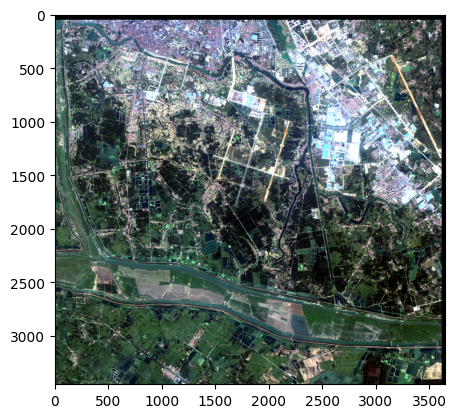

In [4]:
import matplotlib.pyplot as plt
temp = image
temp = (temp - temp.min()) / (temp.max() - temp.min()) * 255
temp = temp.astype("uint8")
plt.imshow(temp[:,:,1:4])
plt.show()